In [1]:
%load_ext autoreload
%autoreload 2

import math
from itertools import product
import uproot
import awkward
import numpy as np
from scipy.stats import binned_statistic_2d
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import matplotlib
matplotlib.rcParams.update({'font.size': 12})
import ROOT
from histogram import *
ROOT.gStyle.SetOptFit(1)

Welcome to JupyROOT 6.18/04


In [2]:
branches = [
    'run',
    'sub',
    'evt',
    'fileno',
    #'n_pfp',

    'backtracked_purity',
    'backtracked_completeness',
    'backtracked_process_is_stopping',
    'backtracked_end_in_tpc',
    
    'backtracked_pc_q_u',
    'backtracked_pc_q_v',
    'backtracked_pc_q_y',
    'backtracked_c_u',
    'backtracked_c_v',
    'backtracked_c_y',
    
    'backtracked_theta',
    'backtracked_phi',
    
    'trkhit_charge_u',
    'trkhit_charge_v',
    'trkhit_charge_y',
    'trkhit_channel_u',
    'trkhit_channel_v',
    'trkhit_channel_y',
    
    'allhit_charge_u',
    'allhit_charge_v',
    'allhit_charge_y',
    'allhit_channel_u',
    'allhit_channel_v',
    'allhit_channel_y',
    
    'calohit_charge_u',
    'calohit_charge_v',
    'calohit_charge_y',
    'calohit_channel_u',
    'calohit_channel_v',
    'calohit_channel_y',
    
    'areahit_charge_u',
    'areahit_charge_v',
    'areahit_charge_y',
    'areahit_channel_u',
    'areahit_channel_v',
    'areahit_channel_y',
    
    'sumhit_charge_u',
    'sumhit_charge_v',
    'sumhit_charge_y',
    'sumhit_channel_u',
    'sumhit_channel_v',
    'sumhit_channel_y',
]

In [3]:
# file_bnb = '/sbnd/data/users/gputnam/NuMuReco/bnblike_single_calo/sbnd_proton.root'
filetype = "proton"
file_bnb= "./sbnd_" + filetype + "_gaus.root"
folder = "caloana"
tree = "CalorimetryAnalyzer"

data = uproot.open(file_bnb)[folder][tree].arrays(branches, namedecode="utf-8")


In [4]:
hittypes = ["all", "trk", "area", "sum", "calo"]
planes = ["_u", "_v", "_y"]
constants = np.array([0.0198,0.0198,0.0198])
toexpand = ["backtracked_theta", "backtracked_phi", "backtracked_process_is_stopping", "backtracked_end_in_tpc",
           "evt", "fileno"]

for no,p in enumerate(planes):
    maxchannel = np.max(data["backtracked_c" + p].flatten())
    minchannel = np.min(data["backtracked_c" + p].flatten())
    channel_arr = np.stack(tuple([np.arange(minchannel, maxchannel+1) for _ in range(len(data["evt"]))]))

    data["allchannel_true_charge" + p] = np.stack(tuple([np.zeros((maxchannel-minchannel+1)) for i 
                                                           in range(len(data["evt"]))]))
    
    toset = []
    for i in range(len((data["backtracked_c"+p]))):
        data["allchannel_true_charge" + p][i, data["backtracked_c"+p][i]-minchannel] = data["backtracked_pc_q"+p][i]
    
    for h in hittypes:
        data[h+"_nhit"+p] = data[h+"hit_channel"+p]._stops - data[h+"hit_channel"+p]._starts
        allchannel = "allchannel_" + h + "charge" + p
        data[allchannel] = np.stack(tuple([np.zeros((maxchannel-minchannel+1)) for i 
                                                           in range(len(data["evt"]))]))


        for i in range(len(data[h+"hit_channel"+p])):
            data[allchannel][i, data[h+"hit_channel"+p][i]-minchannel] = data[h+"hit_charge"+p][i] / constants[no]
            
            
        data[h+"_qdiff"+p] = (np.sum(data[allchannel], axis=1) - np.sum(data["allchannel_true_charge" + p], axis=1)) / np.sum(data["allchannel_true_charge" + p], axis=1)

        goodchannel = data["allchannel_true_charge" + p] > 50000.
        data[h+"_hit_frac"+p] = np.sum((data[allchannel] > 1e-3) & goodchannel, axis=1) / np.sum(goodchannel, axis=1)
        data[h+"_channel_qdiff"+p] = (data[allchannel][goodchannel] - data["allchannel_true_charge" + p][goodchannel]) / data["allchannel_true_charge" + p][goodchannel]
        data[h+"_channel"+p] = channel_arr[goodchannel]
        repeat = np.sum(goodchannel, axis=1)
        for name in toexpand:
            data[h+"_"+name+p] = np.repeat(data[name], repeat)
        

        del data["allchannel_" + h + "charge" + p]
        del goodchannel
        
    del data["allchannel_true_charge" + p]
         


        

/home/grayputnam/.local/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


In [5]:
save=True
outputdir="/home/grayputnam/Work/Summer2020/May5ChargeReco/"

Warning in <TROOT::Append>: Replacing existing TH1: diffQ_calo (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: diffQ_calo (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: diffQ_calo (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: diffQ_calo (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: diffQ_trk (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: diffQ_trk (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: diffQ_trk (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: diffQ_trk (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: diffQ_all (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: diffQ_all (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: diffQ_all (Potential memory leak).
Warning in <TROOT::Append>: Replacing e

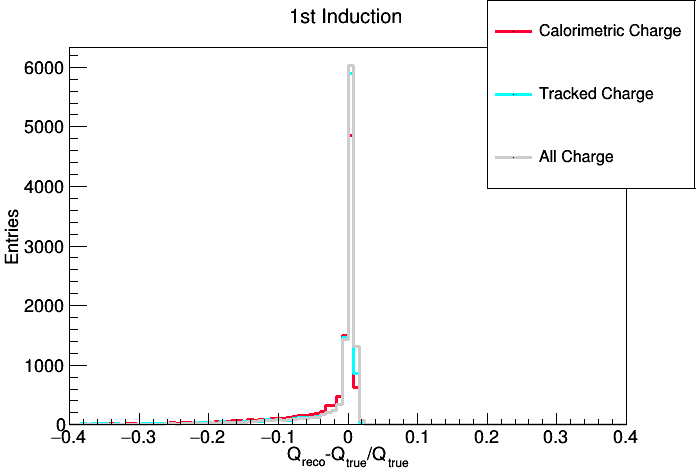

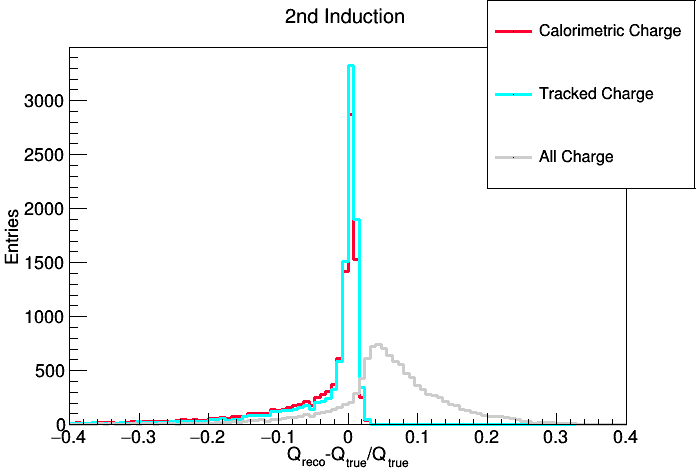

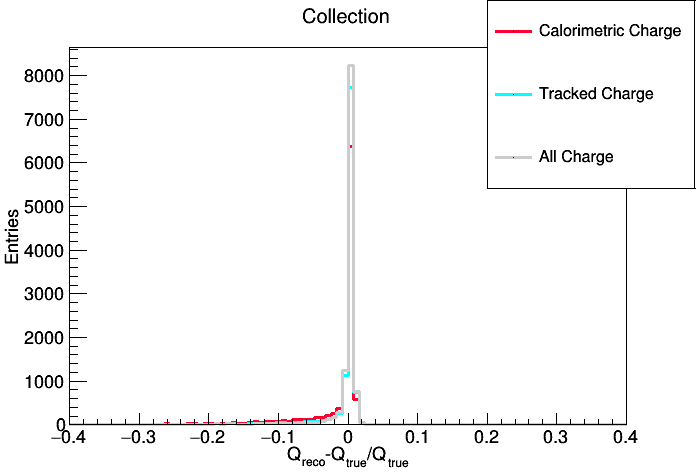

In [10]:
lo = -0.4
hi = 0.4
h_dq_plane = PlaneHistogram(MultiHistogram(
                        ROOT.TH1D("diffQ_calo", "Calorimetric Charge", 100, lo, hi), 
                            ROOT.TH1D("diffQ_trk", "Tracked Charge", 100, lo, hi),
                            ROOT.TH1D("diffQ_all", "All Charge", 100, lo, hi),
                                           name=None)
                           , DEFAULT_PLANES[:-2])

when = (data['backtracked_end_in_tpc']) & (data['backtracked_process_is_stopping'])
# when = data['backtracked_process_is_stopping']
h_dq_plane.Fill(data, "calo_qdiff", "trk_qdiff", "all_qdiff",
                when=when,
                is_planar=None)
h_dq_plane.DrawEach()
h_dq_plane.XTitle("Q_{reco}-Q_{true}/Q_{true}")
h_dq_plane.YTitle("Entries")

if save: h_dq_plane.SaveEachAs(outputdir + "diffQ_gauss_comp.pdf")

Info in <TCanvas::Print>: pdf file /home/grayputnam/Work/Summer2020/May5ChargeReco/diffQ_comp_u.pdf has been created
Info in <TCanvas::Print>: pdf file /home/grayputnam/Work/Summer2020/May5ChargeReco/diffQ_comp_v.pdf has been created
Info in <TCanvas::Print>: pdf file /home/grayputnam/Work/Summer2020/May5ChargeReco/diffQ_comp_y.pdf has been created


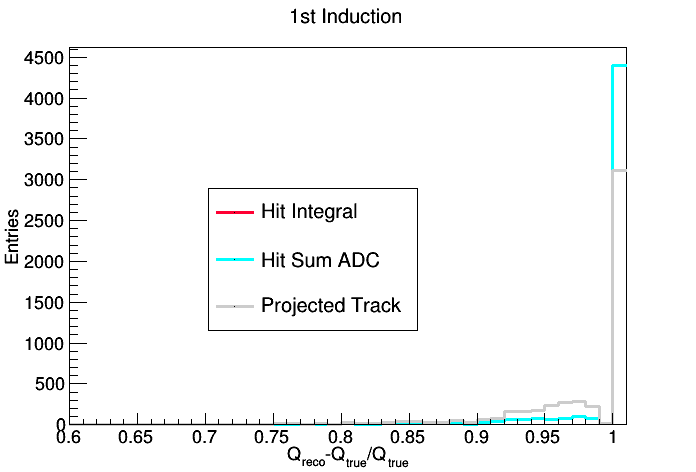

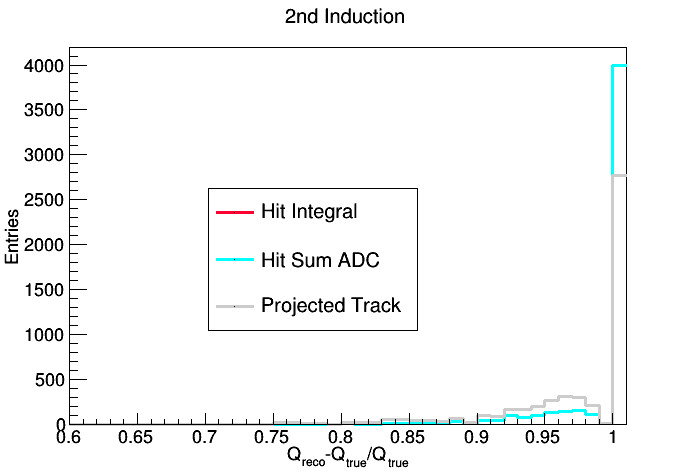

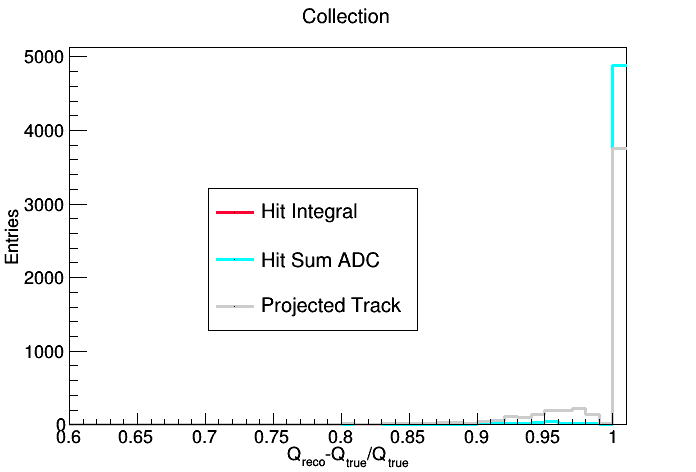

In [7]:
lo = 0.6
hi = 1.01
h_dq_plane = PlaneHistogram(MultiHistogram(ROOT.TH1D("diffQ_old", "Hit Integral", 41, lo, hi),
                            ROOT.TH1D("diffQ_sumadc", "Hit Sum ADC", 41, lo, hi),
                            ROOT.TH1D("diffQ_areahit", "Projected Track", 41, lo, hi), 
                                           name=None)
                           , DEFAULT_PLANES[:-2])

when = (data['backtracked_end_in_tpc']) & (data['backtracked_process_is_stopping']) & \
    (data["area_nhit_u"] > 10)&\
    (data["area_nhit_v"] > 10)&\
    (data["area_nhit_y"] > 10)
h_dq_plane.Fill(data, "calo_hit_frac", "sum_hit_frac", "area_hit_frac",
                when=when,
                is_planar=None)
h_dq_plane.DrawEach(lp=[0.3,0.3,0.6,0.6])
h_dq_plane.XTitle("Q_{reco}-Q_{true}/Q_{true}")
h_dq_plane.YTitle("Entries")
if save: h_dq_plane.SaveEachAs(outputdir + "diffQ_comp.pdf")

 FCN=15851.9 FROM MIGRAD    STATUS=CONVERGED      84 CALLS          85 TOTAL
                     EDM=8.05902e-12    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.3 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.22987e+04   6.09453e+01  -7.51588e-03  -1.53196e-08
   2  Mean         4.19108e-03   2.85548e-05  -2.85942e-08   3.71932e-02
   3  Sigma        1.41151e-02   2.70931e-05   5.26429e-08  -1.09902e-02
 FCN=12215.2 FROM MIGRAD    STATUS=CONVERGED      74 CALLS          75 TOTAL
                     EDM=2.94717e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.04372e+04   5.55032e+01   2.13528e+00   1.11351e-05
   2  Mean        -1.20417e-03   3.08692e-05   1.63258e-06  -3.81476e+00
   3  Sigma        1

Warning in <TROOT::Append>: Replacing existing TH1: diffQ_old (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: diffQ_old (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: diffQ_old (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: diffQ_old (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: diffQ_sumadc (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: diffQ_sumadc (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: diffQ_sumadc (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: diffQ_sumadc (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: diffQ_areahit (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: diffQ_areahit (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: diffQ_areahit (Potential memory leak).
Warning in <TROOT::

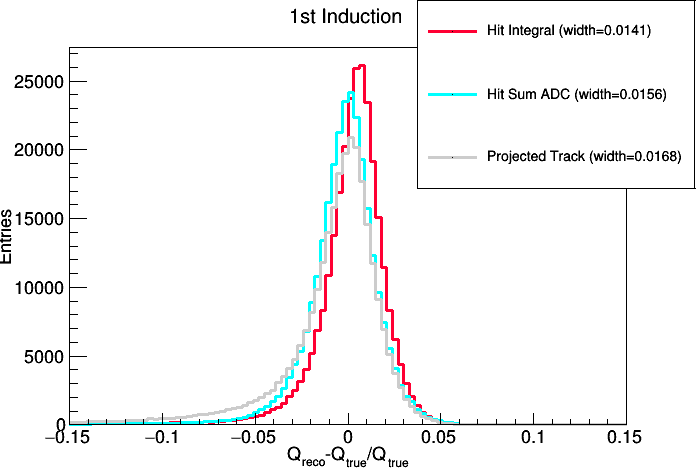

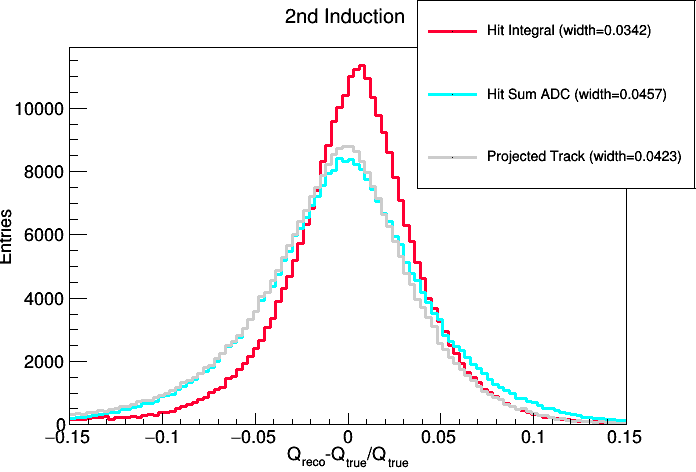

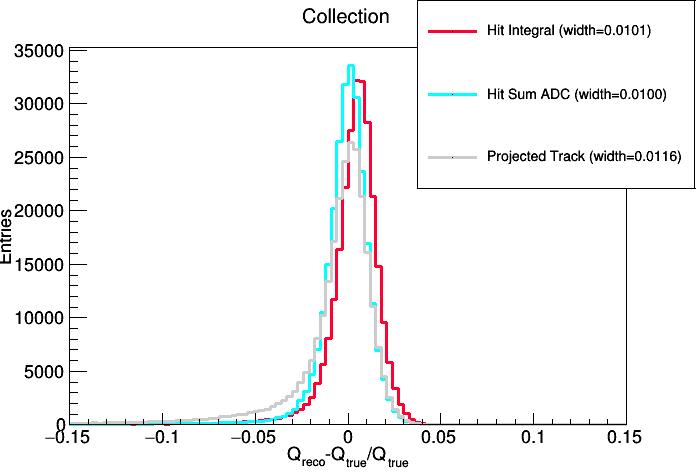

In [9]:
lo = -0.15
hi = 0.15
h_dq_plane = PlaneHistogram(MultiHistogram(ROOT.TH1D("diffQ_old", "Hit Integral", 100, lo, hi),
                            ROOT.TH1D("diffQ_sumadc", "Hit Sum ADC", 100, lo, hi),
                            ROOT.TH1D("diffQ_areahit", "Projected Track", 100, lo, hi), 
                                           name=None)
                           , DEFAULT_PLANES[:-2])


h_dq_plane.Fill(data, "calo_channel_qdiff", "sum_channel_qdiff", "area_channel_qdiff",
  
                is_planar=None)
for histo in  h_dq_plane.ths:
    for h in histo.th:
        h.Fit("gaus", "0")
        gaus = h.GetFunction("gaus")
        sigma = gaus.GetParameter(2)
        h.SetTitle(h.GetTitle() + " (width=%.4f)" % sigma)

h_dq_plane.DrawEach(lp=[0.6,0.6,1,1])
#for histo in  h_dq_plane.ths:
#    histo.canvas.SetLogy()
h_dq_plane.XTitle("Q_{reco}-Q_{true}/Q_{true}")
h_dq_plane.YTitle("Entries")
if save: h_dq_plane.SaveEachAs(outputdir + "diffQ_comp.pdf")

In [ ]:
ROOT.gStyle.SetOptStat(0)
lo = -0.15
hi = 0.15
hits = ["sum", "calo", "area"]

hists = [ROOTHistogram(ROOT.TProfile("diffQ_"+hit, "diffQ_"+hit, 32, 0., 3.2)) for hit in hits]

for hit, h in zip(hits, hists):
    when = data[hit+"_channel_qdiff_y"] > -0.95
    h.Fill(data[hit+"_backtracked_theta_y"][when], data[hit+"_channel_qdiff_y"][when])

colors = [ROOT.kRed, ROOT.kBlack, ROOT.kGreen]
names = ["Sum ADC", "Hit Integral", "Projected Track"]
for i, h in enumerate(hists):
    h.th.SetLineColor(colors[i])
    if i == 0:
        h.Draw()
        h.th.GetYaxis().SetRangeUser(-0.4, 0.4)
        h.th.SetTitle("")
        h.th.SetName(names[i])
        h.XTitle("True Proton#theta")
        h.YTitle("Mean Q_{reco} - Q_{true}/Q_{true}")
    else:
        h.th.Draw("SAME")
        h.th.SetTitle(names[i])
ROOT.gPad.BuildLegend(0.65, 0.65, 1, 1)

#h_dq_plane.XTitle("Q_{reco}-Q_{true}/Q_{true}")
#h_dq_plane.YTitle("Entries")
#if save: h_dq_plane.SaveEachAs(outputdir + "diffQ_comp.pdf")

In [ ]:
def col_proj_length(th, phi):
    pitch = 0.3
    cosgamma = np.cos(th)
    x = np.sin(th)*np.cos(phi)
    length = np.abs((pitch / cosgamma) * x / np.sqrt(1-x**2))
    return np.maximum(length, 0.01)

driftV = 0.156267
tick_period = 0.5

def col_proj_ticks(th, phi):
    return (col_proj_length(th, phi) / driftV) / tick_period


ROOT.gStyle.SetOptStat(0)
lo = -0.15
hi = 0.15
hits = ["calo", "sum", "area"]

xbins = np.logspace(-1, 3, num=50)

hists = [ROOTHistogram(ROOT.TProfile("diffQ_"+hit, "diffQ_"+hit, len(xbins)-1, xbins)) for hit in hits]
for hit, h in zip(hits, hists):
    when = data[hit+"_channel_qdiff_y"] > -0.95
    h.Fill(col_proj_ticks(data[hit+"_backtracked_theta_y"][when], data[hit+"_backtracked_phi_y"][when]),
            data[hit+"_channel_qdiff_y"][when])

colors = [ROOT.kRed, ROOT.kBlack, ROOT.kGreen]
names = ["Hit Integral", "Sum ADC", "Projected Track"]
for i, h in enumerate(hists):
    h.th.SetLineColor(colors[i])
    if i == 0:
        h.Draw()
        h.th.GetYaxis().SetRangeUser(-0.4, 0.4)
        h.th.SetTitle("")
        h.th.SetName(names[i])
        h.XTitle("Collection Plane Per-Wire X Distance [ticks]")
        h.YTitle("Mean Q_{reco} - Q_{true}/Q_{true}")
        h.canvas.SetLogx()
        h.th.GetXaxis().SetRangeUser(0.1, 1000.)
    else:
        h.th.Draw("SAME")
        h.th.SetTitle(names[i])
ROOT.gPad.BuildLegend(0.15, 0.6, 0.45, 0.85)

axis = ROOT.TGaxis(ROOT.gPad.GetUxmin(), 0.4, ROOT.gPad.GetUxmax(), 0.4,
                  0.1 * tick_period * driftV, 1000. * tick_period * driftV, 510, "G-")
axis.SetTitle("Collection Plane Per-Wire X Distance [cm]")
style_axis(axis)
axis.Draw()

line = ROOT.TLine(15,-0.4,15,0.4)
line.SetLineColor(ROOT.kGray)
line.SetLineWidth(4)
line.SetLineStyle(9)
line.Draw()
text = ROOT.TText(0.3, -0.3, "Intrinsic Pulse Width")
text.SetTextColor(ROOT.kGray)
text.Draw()

#h_dq_plane.XTitle("Q_{reco}-Q_{true}/Q_{true}")
#h_dq_plane.YTitle("Entries")
#if save: h_dq_plane.SaveEachAs(outputdir + "diffQ_comp.pdf")
if save: hists[0].canvas.SaveAs(outputdir + "diffQ_v_window_y.pdf")

Info in <TCanvas::Print>: pdf file /home/grayputnam/Work/Summer2020/May5ChargeReco/diffQ_calo_v_window_y.pdf has been created


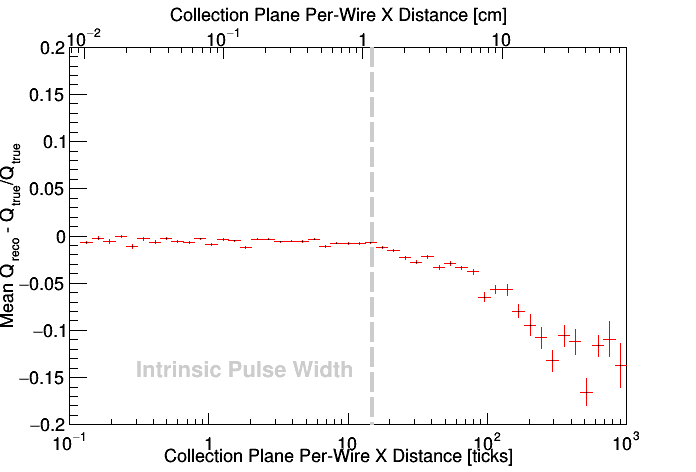

In [69]:
def col_proj_length(th, phi):
    pitch = 0.3
    cosgamma = np.cos(th)
    x = np.sin(th)*np.cos(phi)
    length = np.abs((pitch / cosgamma) * x / np.sqrt(1-x**2))
    return np.maximum(length, 0.01)

driftV = 0.156267
tick_period = 0.5

def col_proj_ticks(th, phi):
    return (col_proj_length(th, phi) / driftV) / tick_period


ROOT.gStyle.SetOptStat(0)
lo = -0.15
hi = 0.15
hits = ["calo"]

xbins = np.logspace(-1, 3, num=50)

hists = [ROOTHistogram(ROOT.TProfile("diffQ_"+hit, "diffQ_"+hit, len(xbins)-1, xbins)) for hit in hits]
for hit, h in zip(hits, hists):
    when = data[hit+"_channel_qdiff_y"] > -0.95
    h.Fill(col_proj_ticks(data[hit+"_backtracked_theta_y"][when], data[hit+"_backtracked_phi_y"][when]),
            data[hit+"_channel_qdiff_y"][when])

colors = [ROOT.kRed, ROOT.kBlack, ROOT.kGreen]
names = ["Sum ADC", "Hit Integral", "Projected Track"]
for i, h in enumerate(hists):
    h.th.SetLineColor(colors[i])
    if i == 0:
        h.Draw()
        h.th.GetYaxis().SetRangeUser(-0.2, 0.2)
        h.th.SetTitle("")
        h.th.SetName(names[i])
        h.XTitle("Collection Plane Per-Wire X Distance [ticks]")
        h.YTitle("Mean Q_{reco} - Q_{true}/Q_{true}")
        h.canvas.SetLogx()
        h.th.GetXaxis().SetRangeUser(0.1, 1000.)
    else:
        h.th.Draw("SAME")
        h.th.SetTitle(names[i])

axis = ROOT.TGaxis(ROOT.gPad.GetUxmin(), 0.2, ROOT.gPad.GetUxmax(), 0.2,
                  0.1 * tick_period * driftV, 1000. * tick_period * driftV, 510, "G-")
axis.SetTitle("Collection Plane Per-Wire X Distance [cm]")
style_axis(axis)
axis.Draw()

line = ROOT.TLine(15,-0.2,15,0.2)
line.SetLineColor(ROOT.kGray)
line.SetLineWidth(4)
line.SetLineStyle(9)
line.Draw()
text = ROOT.TText(0.3, -0.15, "Intrinsic Pulse Width")
text.SetTextColor(ROOT.kGray)
text.Draw()

#h_dq_plane.XTitle("Q_{reco}-Q_{true}/Q_{true}")
#h_dq_plane.YTitle("Entries")
#if save: h_dq_plane.SaveEachAs(outputdir + "diffQ_comp.pdf")
if save: hists[0].canvas.SaveAs(outputdir + "diffQ_calo_v_window_y.pdf")

Info in <TCanvas::Print>: pdf file /home/grayputnam/Work/Summer2020/May5ChargeReco/window_dist_proton.pdf has been created


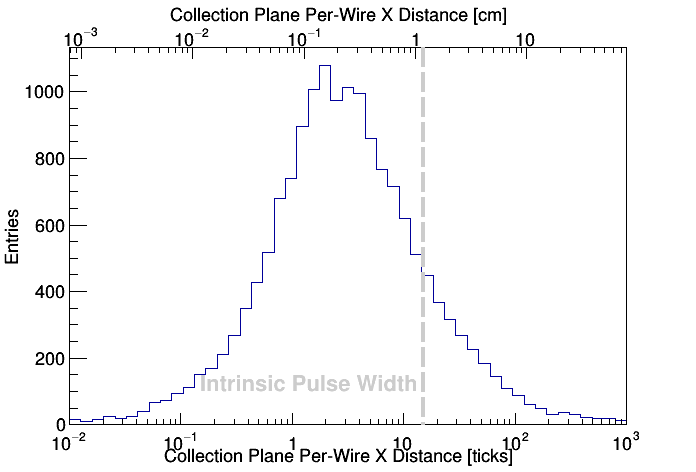

In [62]:
def col_proj_length(th, phi):
    pitch = 0.3
    driftV = 0.156267
    tick_period = 0.5
    cosgamma = np.cos(th)
    x = np.sin(th)*np.cos(phi)
    length = np.abs((pitch / cosgamma) * x / np.sqrt(1-x**2))
    ticks = (length / driftV) / tick_period
    return np.maximum(ticks, 0.01)
    
xbins = np.logspace(-2, 3, num=50)
ROOT.gStyle.SetOptStat(0)
h_proj_length = ROOTHistogram(ROOT.TH1D("", "", len(xbins)-1, xbins))
h_proj_length.Fill(col_proj_length(data["backtracked_theta"], data["backtracked_phi"]))
h_proj_length.Draw()
#h_proj_length.canvas.SetLogy()
h_proj_length.canvas.SetLogx()
h_proj_length.XTitle("Collection Plane Per-Wire X Distance [ticks]")
h_proj_length.YTitle("Entries")
axis = ROOT.TGaxis(ROOT.gPad.GetUxmin(), ROOT.gPad.GetUymax(), ROOT.gPad.GetUxmax(), ROOT.gPad.GetUymax(),
                  0.01 * tick_period * driftV, 1000. * tick_period * driftV, 510, "G-")
axis.SetTitle("Collection Plane Per-Wire X Distance [cm]")
style_axis(axis)
axis.Draw()

line = ROOT.TLine(15,0,15,ROOT.gPad.GetUymax())
line.SetLineColor(ROOT.kGray)
line.SetLineWidth(4)
line.SetLineStyle(9)
line.Draw()
text = ROOT.TText(0.15, ROOT.gPad.GetUymin() + 100, "Intrinsic Pulse Width")
text.SetTextColor(ROOT.kGray)
text.Draw()
if save: h_proj_length.canvas.SaveAs(outputdir + "window_dist_" + filetype + ".pdf")